## Objective
This is a document classification project to classify spam vs ham. I will construct a spam filter to classify text message as ham or spam. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\spam_1.csv",
                   usecols = [0,1], encoding = 'ISO-8859-1')
df.rename(columns = {'v1': 'Category','v2': 'Message'},inplace = True)

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# import some necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
spam_df = df[df['Category'] == 'spam'] #create sub-dataframe of spam text
ham_df = df[df['Category'] == 'ham'] #sub-dataframe of ham text

In [6]:
spam_df.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [7]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
def wordCount(text): #this contains all the information about the processed length
    try:
        text = text.lower()
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n'+']') 
        txt = regex.sub(' ',text)  #remove punctuation
        words = [w for w in txt.split(' ')
                if w not in stop_words and len(w)>3] # remove stop words and words with length smaller than 3 letters
        return len(words)
    except:
        return 0

In [9]:
#apply the wordcount function to spam and ham (will give count of LENGTH AND PROCESSED LENGTH)
spam_df['len'] = spam_df['Message'].apply(lambda x: len([w for w in x.split(' ')]))
ham_df['len'] = ham_df['Message'].apply(lambda x: len([w for w in x.split(' ')]))
spam_df['processed_len'] = spam_df['Message'].apply(lambda x: wordCount(x))
ham_df['processed_len'] = ham_df['Message'].apply(lambda x: wordCount(x))

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [10]:
#Count the number of punctuation
spam_df['punct']=spam_df['Message'].apply(lambda l1: sum([1 for x in l1 if x in set(string.punctuation)]))
ham_df['punct']= ham_df['Message'].apply(lambda l1: sum([1 for x in l1 if x in set(string.punctuation)]))

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
spam_df.head()

,Category,Message,len,processed_len,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,12,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,32,9,8
8,spam,WINNER!! As a valued network customer you have...,26,14,6
9,spam,Had your mobile 11 months or more? U R entitle...,29,13,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",26,10,8


In [12]:
ham_df.head()

,Category,Message,len,processed_len,punct
0,ham,"Go until jurong point, crazy.. Available only ...",20,10,9
1,ham,Ok lar... Joking wif u oni...,6,1,6
3,ham,U dun say so early hor... U c already then say...,11,2,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,5,2
6,ham,Even my brother is not like to speak with me. ...,16,8,2


In [13]:
print ('spam length info')
print (spam_df[['len', 'processed_len']].describe())
print ('ham length info')
print (ham_df[['len', 'processed_len']].describe())

spam length info
              len  processed_len
count  747.000000     747.000000
mean    23.892905      11.068273
std      5.826977       3.128079
min      2.000000       0.000000
25%     22.000000       9.000000
50%     25.000000      11.000000
75%     28.000000      13.000000
max     35.000000      19.000000
ham length info
               len  processed_len
count  4825.000000    4825.000000
mean     14.323938       5.652435
std      11.538966       4.767743
min       1.000000       0.000000
25%       7.000000       3.000000
50%      11.000000       4.000000
75%      19.000000       7.000000
max     171.000000      64.000000


(0.0, 50.0)

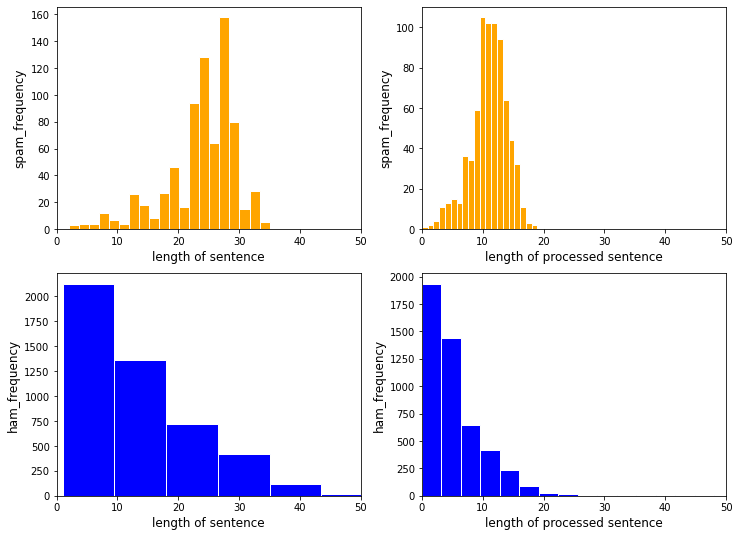

In [14]:
xmin = 0
xmax = 50
fig, ((ax,ax1),(ax2,ax3)) = plt.subplots (2,2,figsize = (12,9))
spam_df['len'].plot.hist(bins = 20, ax = ax, edgecolor = 'white', color = 'orange') #ax
spam_df['processed_len'].plot.hist(bins = 20, ax = ax1, edgecolor = 'white', color = 'orange') #ax1
ham_df['len'].plot.hist(bins = 20, ax = ax2, edgecolor = 'white', color = 'blue') #ax2
ham_df['processed_len'].plot.hist(bins = 20, ax = ax3, edgecolor = 'white', color = 'blue') #ax3
# 4 lines for ax
ax.tick_params(labelsize = 10) #increases the size(font) of x and y axis numbers
ax.set_xlabel('length of sentence', fontsize = 12) #name x axis
ax.set_ylabel('spam_frequency', fontsize = 12) #name y axis
ax.set_xlim([xmin,xmax]) #set limit which is xmin and xmax
#4 lines for ax1
ax1.tick_params(labelsize = 10)
ax1.set_xlabel('length of processed sentence', fontsize = 12)
ax1.set_ylabel('spam_frequency', fontsize = 12)
ax1.set_xlim([xmin,xmax])
#4 lines for ax2
ax2.tick_params(labelsize = 10)
ax2.set_xlabel('length of sentence', fontsize = 12)
ax2.set_ylabel('ham_frequency', fontsize = 12)
ax2.set_xlim([xmin,xmax])
#4 lines for ax3
ax3.tick_params(labelsize = 10)
ax3.set_xlabel('length of processed sentence', fontsize = 12)
ax3.set_ylabel('ham_frequency', fontsize = 12)
ax3.set_xlim([xmin,xmax])

In [15]:
def tokenize(text):
   ## exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [16]:
spam_df['tokens'] = spam_df['Message'].map(tokenize)
ham_df['tokens'] = ham_df['Message'].map(tokenize)

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
spam_df.head(3)

,Category,Message,len,processed_len,punct,tokens
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,12,6,"[free, entry, wkly, comp, win, cup, final, tkt..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,32,9,8,"[freemsg, hey, darling, week, word, back, like..."
8,spam,WINNER!! As a valued network customer you have...,26,14,6,"[winner, valued, network, customer, selected, ..."


In [18]:
ham_df.head(3)

,Category,Message,len,processed_len,punct,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",20,10,9,"[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,6,1,6,"[lar, joking, wif, oni]"
3,ham,U dun say so early hor... U c already then say...,11,2,6,"[dun, say, early, hor, already, say]"


In [19]:
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token #combine text in different columns in one list
ham_words = []
for token in ham_df['tokens']:
    ham_words += token

In [20]:
spam_count = Counter(spam_words).most_common(10)
ham_count = Counter(ham_words).most_common(10)

In [21]:
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

In [22]:
spam_count_df.head(3)

,word,count
0,call,370
1,free,228
2,txt,170


Text(0.5, 1.0, 'ham top 10 words')

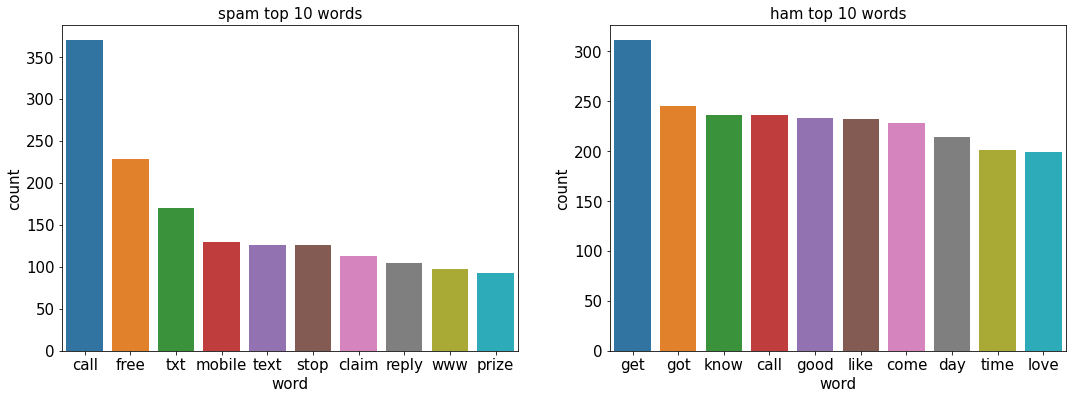

In [23]:
fig, (ax,ax1) = plt.subplots(1,2,figsize = (18, 6))
# for spam_count_df (spam words and there count)
sns.barplot(x = spam_count_df['word'], y = spam_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('spam top 10 words', fontsize = 15)
# for ham_count_df (ham words and there count)
sns.barplot(x = ham_count_df['word'], y = ham_count_df['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('ham top 10 words', fontsize = 15)

In [24]:
spam_words_str = ' '.join(spam_words) #joined all the spam words into a paragraph
ham_words_str = ' '.join(ham_words)

In [25]:
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(ham_words_str)

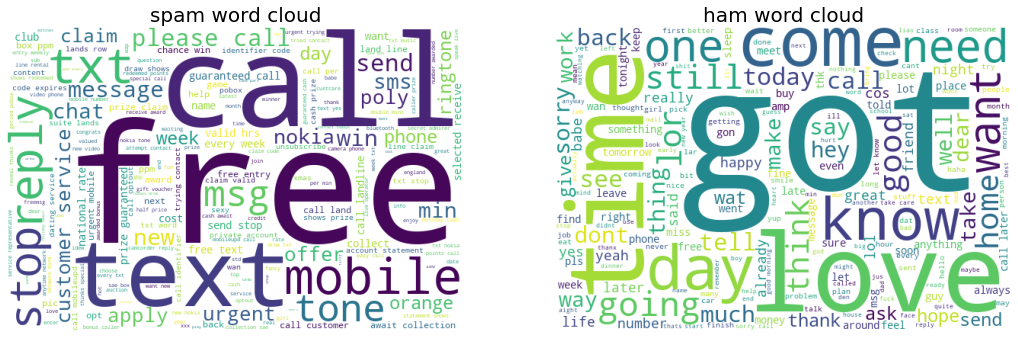

In [26]:
fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))
ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 20)
ax2.imshow(ham_word_cloud)
ax2.axis('off')
ax2.set_title('ham word cloud', fontsize = 20)
plt.show()

In [27]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['tokens'] = df['Message'].map(tokenize)

In [29]:
df.head()

,Category,Message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,"[lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"


In [30]:
def text_join(text):
    return " ".join(text)
df['text'] = df['tokens'].apply(text_join)
df.head()

,Category,Message,tokens,text
0,ham,"Go until jurong point, crazy.. Available only ...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,"[lar, joking, wif, oni]",lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt...",free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]",dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though


In [31]:
#Tfidf - Term frequency * inverse document frequency - it return result in form of vector matrix
tv = TfidfVectorizer('english')
features = tv.fit_transform(df['text'])
target = df.Category.map({'ham':0, 'spam':1})
df.head()

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,Category,Message,tokens,text
0,ham,"Go until jurong point, crazy.. Available only ...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,"[lar, joking, wif, oni]",lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt...",free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]",dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though


In [32]:
print(tv.get_feature_names())

['aah', 'aaniye', 'aaooooright', 'aathi', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'absolutly', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accounts', 'accumulation', 'achan', 'ache', 'achieve', 'acid', 'acknowledgement', 'acl', 'acnt', 'aco', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'ads', 'adsense', 'adult', 'adults', 

In [33]:
print(features)

  (0, 6982)	0.20540470770393918
  (0, 208)	0.3676218947072558
  (0, 2601)	0.17041986213417093
  (0, 1124)	0.31056846220413076
  (0, 841)	0.350934835431379
  (0, 7186)	0.24866762740081433
  (0, 2638)	0.20307453718763338
  (0, 843)	0.31056846220413076
  (0, 435)	0.2749691881256075
  (0, 1392)	0.28469785151199595
  (0, 4741)	0.28753727742829105
  (0, 3294)	0.3676218947072558
  (1, 4386)	0.5680234078725725
  (1, 7094)	0.44852688817021014
  (1, 3264)	0.5441813263961918
  (1, 3436)	0.4243108797790347
  (2, 293)	0.22381568971825005
  (2, 5061)	0.22381568971825005
  (2, 6684)	0.16417010997365977
  (2, 6021)	0.2607557225570054
  (2, 5009)	0.2369986007708416
  (2, 5114)	0.22166704594183287
  (2, 6371)	0.1624811888871713
  (2, 3828)	0.20938028806466372
  (2, 6505)	0.2927246972127295
  :	:
  (5567, 1130)	0.2474392009823677
  (5567, 4897)	0.25991042977266576
  (5567, 4600)	0.27821955591264946
  (5567, 5061)	0.3073560855152239
  (5568, 2016)	0.782681381846728
  (5568, 2571)	0.43953417232463426
  (55

In [34]:
print(target)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


## feature and target will be used for training our model

### used **SVC**, **Random Forest**, **Gradient Boosting Classification**, **LightGBM**, and **Multinomial Naive Bayes** as my training model

In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score,classification_report
# from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [36]:
X = features
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4457, 7344)
(1115, 7344)
(4457,)
(1115,)


In [38]:
from collections import Counter #smote used because the dataset was imbalanced(counter helps in counting just)
from imblearn.combine import SMOTETomek
smt=SMOTETomek(0.80) #80% of the data 
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

C:\Users\sanjay\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 3876, 1: 581})
The number of classes after fit Counter({0: 3876, 1: 3100})


## DECISION TREE 

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_smt, y_train_smt)
y_pred = dtc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.95


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))
print(cm)

[[915  34]
 [ 22 144]]


In [44]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       949
           1       0.81      0.87      0.84       166

    accuracy                           0.95      1115
   macro avg       0.89      0.92      0.90      1115
weighted avg       0.95      0.95      0.95      1115



In [45]:
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid = {"criterion":['gini','entropy'],
              "max_depth": range(1,30), 
              "max_leaf_nodes": range(2,30), #max_leaf_node could not start from 1
              "min_samples_leaf": randint(1,20),
              "min_samples_split":range(1,30),
             "splitter":['best','random']} 
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(X_train_smt,y_train_smt)
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 16, 'min_samples_leaf': 11, 'min_samples_split': 8, 'splitter': 'best'}
Best score is 0.9422300274208955


In [46]:
y_pred = rsc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(rsc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.92


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))

In [48]:
print(cm)

[[888  61]
 [ 29 137]]


In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       949
           1       0.69      0.83      0.75       166

    accuracy                           0.92      1115
   macro avg       0.83      0.88      0.85      1115
weighted avg       0.93      0.92      0.92      1115



## XGBOOST

In [50]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier()
xgb.fit(X_train_smt, y_train_smt)
y_pred = xgb.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(xgb.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.97


## RANDOM FOREST

In [60]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#creating a random forest instance   #while initializing no parameter
rfr =RandomForestClassifier(random_state=56)

In [62]:
#train the model
rfr.fit(X_train_smt, y_train_smt)

RandomForestClassifier(random_state=56)

In [63]:
#score on training data
rfr.score(X_train_smt, y_train_smt)

0.9998566513761468

In [65]:
#score on training data
rfr.score(X_val,y_val)

0.9766816143497757

In [74]:
y_predict = rfr.predict(X_val)
RF=pd.DataFrame({'Actual':y_val, 'Predicted':y_predict})  
RF.head(5)

,Actual,Predicted
4456,0,0
690,0,0
944,0,0
3768,0,0
1189,0,0


## SVC

In [72]:
from sklearn.svm import SVC #imported svc

In [76]:
model = SVC(kernel='rbf',C=30,gamma='auto') #fit model on training data and chcek score of test data
model.fit(X_train_smt, y_train_smt)
model.score(X_val,y_val)

0.8932735426008969

In [77]:
y_predict = model.predict(X_val)print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(xgb.score(X_val, y_val)))

In [78]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Multinomial Naive Bayes

In [81]:
mnb = MultinomialNB() #fit model on training data and chcek score of test data
mnb.fit(X_train_smt, y_train_smt)
mnb.score(X_val,y_val)

0.9641255605381166

In [82]:
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid = {"alpha" : [1.0,1.5,2.0,2.5,3.0,4.0,5.0]} 
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(mnb,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(X_train_smt,y_train_smt)
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tuned Decision Tree Parameters: {'alpha': 1.0}
Best score is 0.9720475295519199


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.6s finished


In [83]:
mnb = MultinomialNB(alpha = 1.0) #fit model on training data and chcek score of test data
mnb.fit(X_train_smt, y_train_smt)
mnb.score(X_val,y_val)

0.9641255605381166

In [84]:
y_predict = mnb.predict(X_val)

In [85]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))
print('Accuracy of XgBoost Classifier on test set: {:.2f}'.format(xgb.score(X_val, y_val)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rfr.score(X_val, y_val)))
print('Accuracy of SVC  on test set: {:.2f}'.format(model.score(X_val, y_val)))
print('Accuracy of Multinomial Naive Bayes on test set: {:.2f}'.format(mnb.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.95
Accuracy of XgBoost Classifier on test set: 0.97
Accuracy of Random Forest Classifier on test set: 0.98
Accuracy of SVC  on test set: 0.89
Accuracy of Multinomial Naive Bayes on test set: 0.96
